In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv


In [3]:
df=pd.read_csv("/content/employees.csv")

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace = True)

In [6]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

In [8]:
df.duplicated().sum()

3008

In [9]:
df=df.drop_duplicates(keep="first")

In [10]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [11]:
df.shape

(11991, 10)

Normality Test


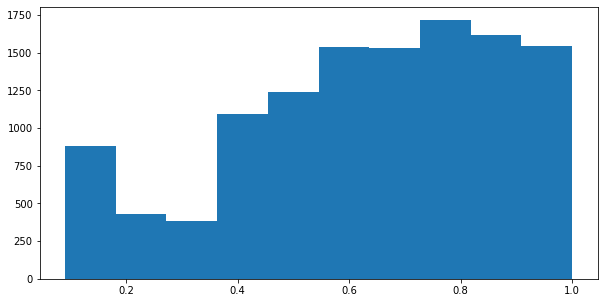

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

In [13]:
# h0 - data is normally distributed
# h1 - data is not normally distributed

In [14]:
from scipy.stats import shapiro

In [15]:
stat,p_value=shapiro(df["satisfactoryLevel"])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
print(p_value)

0.0


In [17]:
# p value is less than 0.05 reject null hypothesis, data is not normally distributed

In [18]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
df1=df

In [20]:
 from sklearn.preprocessing import LabelEncoder
 l1=LabelEncoder()
 df1["salary"]=l1.fit_transform(df1["salary"])
 


In [21]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [22]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


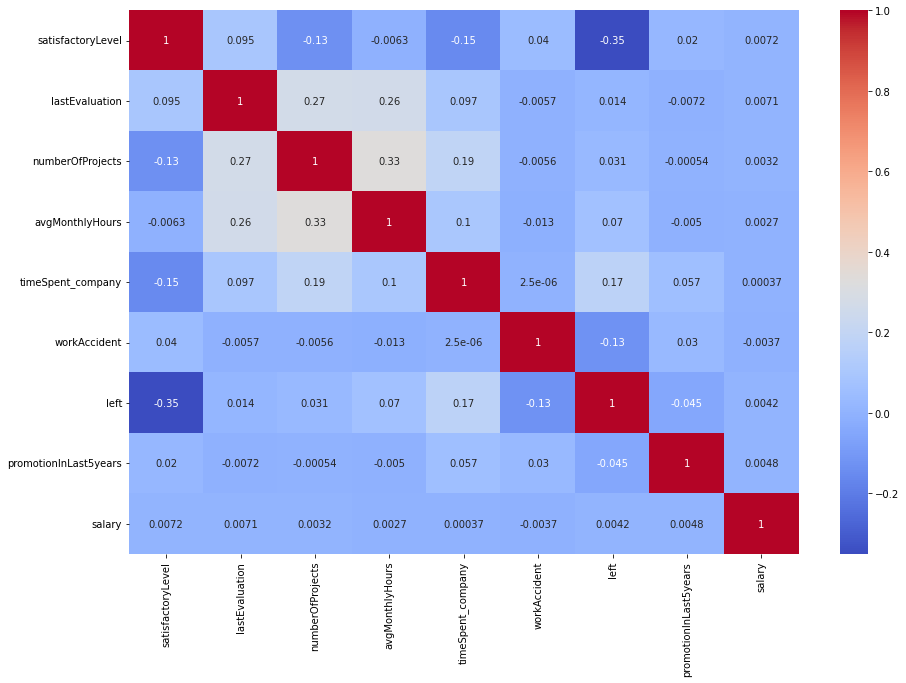

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

In [24]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [25]:
emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [26]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,support,1
379,0.48,0.78,2,198,2,0,1,0,technical,2
413,0.34,0.67,4,141,2,0,1,0,sales,1
1239,0.14,0.47,4,175,2,0,1,0,RandD,2
1426,0.19,0.58,5,182,2,0,0,0,technical,2


In [27]:
emp["left"].value_counts()

0    211
1      6
Name: left, dtype: int64

In [28]:
emp.shape

(217, 10)

In [29]:
emp["avgMonthlyHours"].mean()

167.2258064516129

In [30]:
# t-test
# It is used to determine if there is a significant difference between the means of two groups 

In [31]:
# One sample t-test - It tells us whether the means of the sample and the population are different or not


The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


In [32]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [33]:
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
7,0.42,0.53,2,142,3,0,1,0,sales,1
8,0.45,0.54,2,135,3,0,1,0,sales,1


In [34]:
employee.shape

(1462, 10)

In [35]:
# null hypothesis - avg monthly hours of a employee having 2 yrs exp and the employee more thanthat have same 167 avg monthly hrs
# alternate hypothesis - avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee


In [36]:
sample_size= 100
sample1= employee.sample(sample_size,random_state=0)

In [37]:
pos_mean=167


In [38]:
print(sample1["avgMonthlyHours"].mean())

154.2


In [39]:
from scipy.stats import ttest_1samp

In [40]:
statistics,pvalue=ttest_1samp(sample1["avgMonthlyHours"],pos_mean)
print(statistics,pvalue)

-6.812850056008294 7.534573793907689e-10


In [41]:
 # p value is less than 0.05
#reject null hypothesis,avg monthly hours is not 167 hours for employees having more than 2 yrs of exp

In [42]:
# one sample test for proportion

The percentage of employee leaving the company 
is 3% having experience of 2 years. Is it
 same for employees having more than 2
years experience?

In [43]:
# Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs
# Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs

In [44]:
from statsmodels.stats.proportion import proportions_ztest

In [45]:
sample_size=100

In [46]:
sample1=employee.sample(sample_size,random_state=0)

In [47]:
count=sample1["left"].value_counts()

In [48]:
count

1    63
0    37
Name: left, dtype: int64

In [49]:
nobs=len(sample1["left"])

In [50]:
nobs

100

In [51]:
p0=0.3

In [52]:
sample1["left"].value_counts()/nobs

1    0.63
0    0.37
Name: left, dtype: float64

In [53]:
statistic_oneprop,pvalue_oneprop=proportions_ztest(count=count,nobs=nobs,value=p0,alternative="two-sided",prop_var=False)

In [54]:
print(statistic_oneprop,pvalue_oneprop)

-0.5656854249492378 0.5716076449533316


In [55]:
# p value is greater than 0.05 accept null hypothesis and reject alternate hypothesis 
# percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs

In [56]:
from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

NameError: ignored

In [57]:
# Two sample test for means - compared the means of a two independent groups

In [58]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [59]:
df1["timeSpent_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?

In [60]:
# checking the variance of both

In [61]:
e1=df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]

In [62]:
e1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
5,0.10,0.77,6,247,4,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,1
14995,0.99,0.83,4,274,2,0,0,0,sales,1
14996,0.72,0.72,4,175,4,0,0,0,technical,1
14997,0.24,0.91,5,177,5,0,0,0,sales,1


In [63]:
e1.shape

(11167, 10)

In [64]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,2
13,0.78,0.99,4,255,6,0,1,0,sales,1
26,0.84,0.87,4,246,6,0,1,0,hr,1
33,0.57,0.70,3,273,6,0,1,0,support,1
63,0.90,1.00,5,221,6,0,1,0,sales,2


In [65]:
e2.shape

(824, 10)

In [66]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [67]:
 import scipy

In [68]:
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

In [69]:
# p value > 0.05 Hence accept null hypothesis
# The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs



 F-statistics
 

In [70]:
# Sample Variance 
print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.246206030151
2680.904522613065


In [71]:
# Sample mean
print(s1.avgMonthlyHours.mean())
print(s2.avgMonthlyHours.mean())

203.005
203.3


In [72]:
df1=len(s1)
df2=len(s2)

In [73]:
df1

200

In [74]:
df2

200

In [75]:
# Computing f statistic
from scipy.stats import f
s=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(s)


0.8669634395501407
